# Part II - Factors influencing the borrower rate for a Prosper loan
## by Doron Dusheiko

## Investigation Overview


The goal of this analysis is to answer the following question: What affects the borrowers interest rate?
The analysis focused on the credit grade/prosper rating, occupation, employment state, income range, number of credit lines over the last 7 years, number of inquiries over last 6 months, delinqiencies over last 7 years, public records over last 12 months, debt to income ratio, total number of propser loans, monthly loan payment, listing category and the original loan amount requested. 


## Dataset Overview

A dataset consists of 113,937 Prosper loans, including 81 variables such as 
loan amount, borrower rate/interest rate, loan status, borrower income and many others.
21,314 loans were removed due to creating extreme right-tailed distrubutions in certain variables, 
making it difficult to gain insight into the data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [11]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [12]:
# renaming columns to make them easier to work with
df.rename(columns={'ProsperRating (numeric)': 'ProsperRatingNumeric', 'ProsperRating (Alpha)': 'ProsperRatingAlpha', 'ListingCategory (numeric)':'ListingCategoryNumeric'}, inplace=True)

# convert income range, credit grade and prosper rating alpha into ordered categorical types
ordinal_var_dict = {'IncomeRange': ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperRatingAlpha': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    
# convert loan status, listing category, occupation, employment status into nominal categorical variables
nominal_vars = ['ListingCategoryNumeric', 'Occupation', 'EmploymentStatus']
df[nominal_vars] = df[nominal_vars].astype('category')

high_outliers = ((df['InquiriesLast6Months'] > 10) | (df['DelinquenciesLast7Years'] > 10) | (df['PublicRecordsLast12Months'] > 3) | (df['DebtToIncomeRatio'] > 2) | (df['MonthlyLoanPayment'] > 1000) | (df['LoanOriginalAmount'] > 20000))
df = df.loc[-high_outliers,:]

## Borrower Rate Distribution

The distribution is slightly right-skewed, with the majority of interest rates being 0.1 and 0.2% with a large spike at 0.3177. 

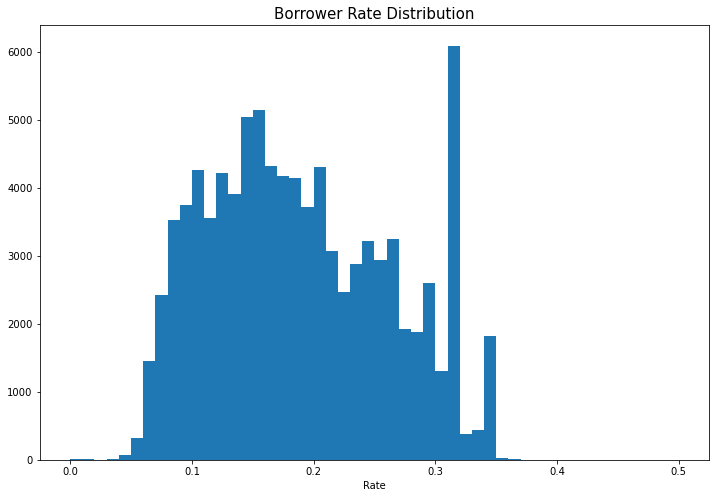

In [16]:
binsize = 0.01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = df, x = 'BorrowerRate', bins=bins)
plt.xlabel('Rate')
plt.title("Borrower Rate Distribution", fontsize=15);
plt.show()

## Borrower Rate as a function of Prosper Rating (post-July 2009) and Credit Grade (pre-July 2009)
As CreditGrade and ProsperRating improve, the mean borrower rate comes down, showing this is a key variable

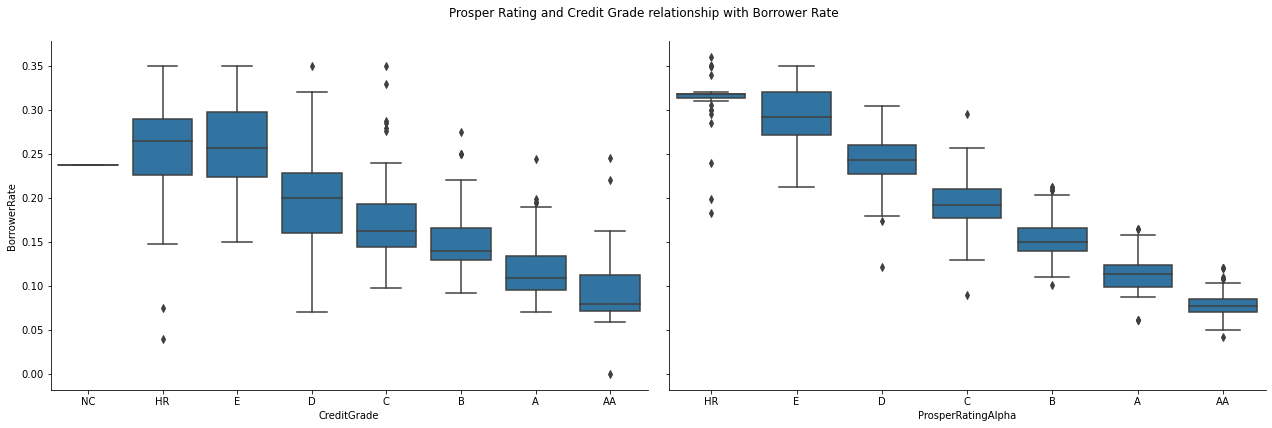

In [34]:
df_samp = df.sample(n=2000, replace = False)
categorical_cols = ['CreditGrade', 'ProsperRatingAlpha']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerRate'], x_vars = categorical_cols,
                height = 6, aspect = 1.5)
g.map(boxgrid)
plt.subplots_adjust(top=.90)
plt.suptitle("Prosper Rating and Credit Grade relationship with Borrower Rate")
plt.show();

## Relationship between Borrower Rate, Employment Status and Income Range
Those not employed tend to get the highest borrower rates, while full-time persons and those earning between 50K and 100K+ tend to get the lowest interests rates.

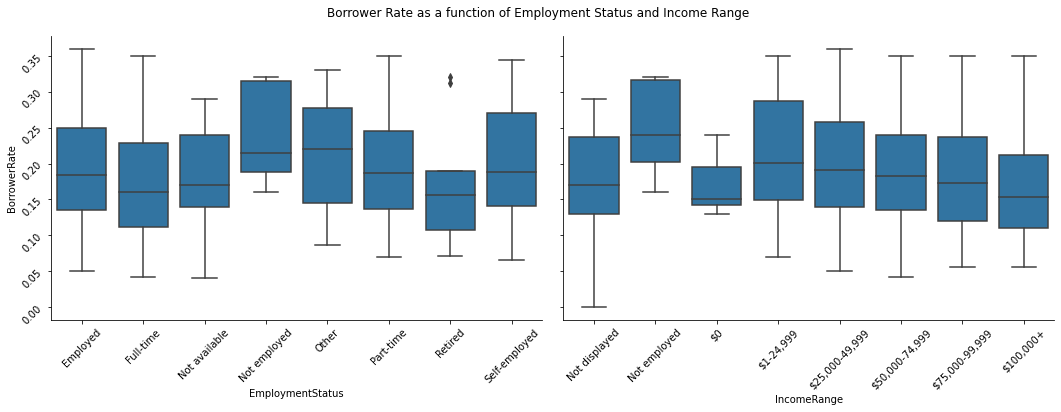

In [36]:
#plt.figure(figsize = [15, 20])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerRate'], x_vars = categorical_cols2,
                height = 5, aspect = 1.5)
g.map(boxgrid)
for ax in g.axes.flatten():
    ax.tick_params(rotation = 45)

plt.subplots_adjust(top=.90)
plt.suptitle("Borrower Rate as a function of Employment Status and Income Range")
plt.show();

## Relationship between Income Range, Employment Status and Prosper Rating
Highest earners will tend to be full-time employees, D ProsperRating is most common for those in the 25K - 50L range and C in the 50K - 75K range.

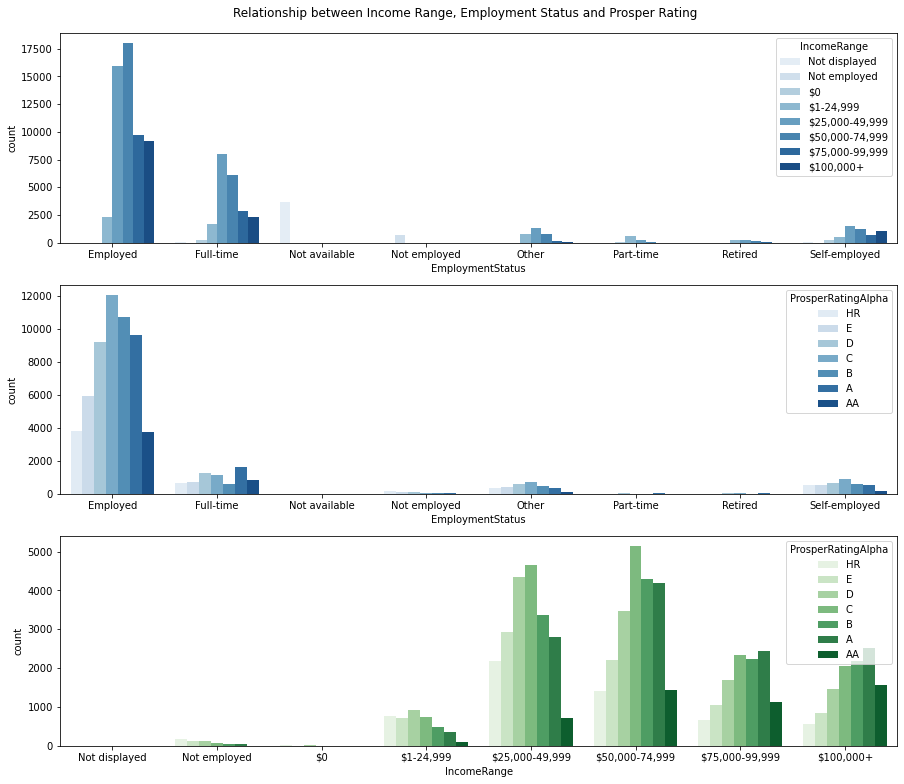

In [25]:
plt.figure(figsize = [15, 12])
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')

ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'ProsperRatingAlpha', palette = 'Blues')

ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'IncomeRange', hue = 'ProsperRatingAlpha', palette = 'Greens')

plt.subplots_adjust(top=.95)
plt.suptitle("Relationship between Income Range, Employment Status and Prosper Rating")
plt.show()


## Borrower Rate and Debt to Income Ratio by Home Ownership
From the distribution of Borrower Rate as a function of home ownership, we can see that being a home owner does attract a slightly better borrower rate.


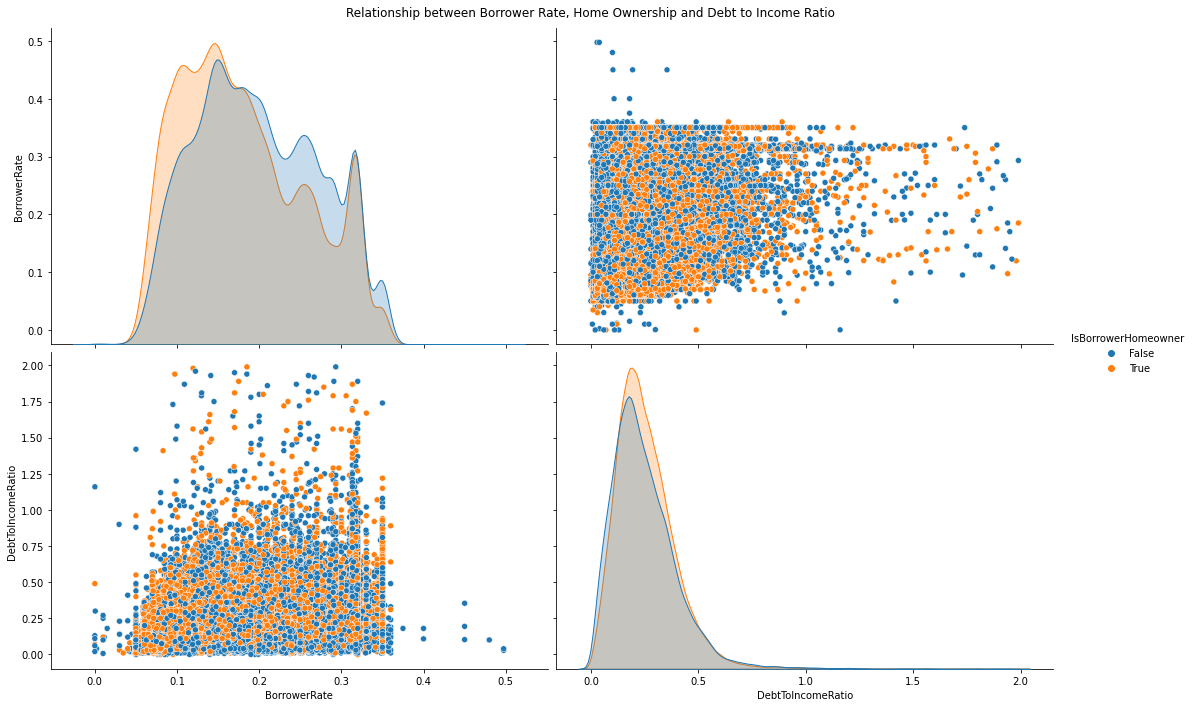

In [26]:
ax = sb.pairplot(df[['BorrowerRate', 'IsBorrowerHomeowner', 'DebtToIncomeRatio']], hue="IsBorrowerHomeowner", height=5, aspect=1.5)
ax.fig.subplots_adjust(top=.95)
ax.fig.suptitle('Relationship between Borrower Rate, Home Ownership and Debt to Income Ratio');